In [1]:
import pandas as pd 
import numpy as np
import os

from collections import defaultdict

In [2]:
ratings = []

for category in ["customer_support", "finance", "health_care"]:
    for file in os.listdir(f"ratings/{category}"):
        if file != ".ipynb_checkpoints":
            
            # Find model type
            model = file.split("_")[1]
            
            with open(f"ratings/{category}/{file}") as f:
                text = f.read()
                # Combine data and metadata
                ratings.append({**{"Model": model, "Category": category}, **dict([score[2:].split(":") for score in text.split("\n")[4:]])})
                
pd.DataFrame(ratings)

,Model,Category,Feature attention,Temporal attention,Spatiotemporal attention,General
0,LSTM,customer_support,10,3,5,7
1,CNN,customer_support,4,1,4,8
2,CNN-LSTM,customer_support,10,7,9,8


In [33]:
sliders = []

for category in ["customer_support", "finance", "health_care"]:
    for file in os.listdir(f"sliders/{category}"):
        if file != ".ipynb_checkpoints":
            
            # Find model type
            model = file.split("_")[1]
            
            with open(f"sliders/{category}/{file}") as f:
                text = f.read()
                # Combine data and metadata
                combined = {**{"Model": model, "Category": category}, **eval(text.split("\n")[-1][8:])}
                combined = {k: float(v) if k not in ["Model", "Category"] else v for k, v in combined.items() }
                sliders.append(combined)

df1 = pd.DataFrame(sliders) #.iloc[:, 2:].sum(axis=1)

In [34]:
df1.iloc[:, 2:] = df1.iloc[:, 2:].divide(df1.iloc[:, 2:].sum(axis=1), axis=0) * 100
df1

,Model,Category,isco code,function id,company,education,days worked,isco level,CV,skills,certificates,languages,licenses,location
0,LSTM,customer_support,12.406203,9.754877,7.703852,14.407204,14.407204,0.000000,15.257629,0.0,0.0,16.108054,0.0,9.954977
1,CNN,customer_support,0.000000,0.000000,23.716012,0.000000,23.967774,14.551863,0.000000,0.0,0.0,18.429003,0.0,19.335347
2,CNN-LSTM,customer_support,5.002501,4.902451,3.201601,21.260630,22.211106,13.956978,0.000000,0.0,0.0,20.260130,0.0,9.204602


array([<AxesSubplot:title={'center':'CNN'}>,
       <AxesSubplot:title={'center':'CNN-LSTM'}>,
       <AxesSubplot:title={'center':'LSTM'}>], dtype=object)

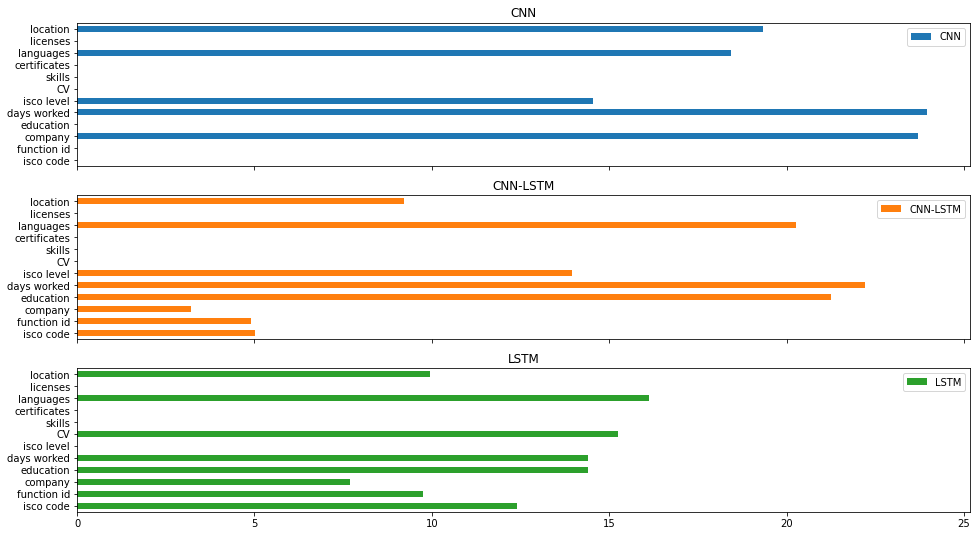

In [56]:
df1.drop("Category", axis=1).groupby("Model").mean().T.plot(kind="barh", subplots=True, figsize=(16, 9))

In [5]:
acc = 0.615
n = 11373

1.96 * np.sqrt( ((1 - acc) * (acc)) / n)

0.008943066794025734